# Analysing GEDI data using Pandas

**author**: Stefanie Lumnitz, stefanie.lumnitz@esa.int

**goal**: explore GEDI 2A and 2B data structures, content

**content**:
* A closer look at canopy metrics
* using `pandas.DataFrames` to investigate the content of HDF5 files
* plotting with `datashader`

## Investigating Canopy Metrics

From the previous notebook, we learned how to access GEDI data stored in HDF5 file format. Let's now have a closer look at some of the canopy metrics, i.e.

**cover**: Total canopy cover, defined as the percent of the ground covered by the vertical projection of canopy material

**cover-z**: Cumulative canopy cover from height (z) to ground (z=0) with a vertical step size of dZ, where cover(z > z_max) = 0

**fhd_normal**: Foliage height diversity index calculated by vertical foliage profile normalized by total plant area index

**pai**: Total plant area index

We will therefore use the `h5py` library again to load data, before transformaton into a `pandas` object for further analysis.

In [1]:
import h5py
import os
import pandas as pd
import numpy as np

In [2]:
file_path_1B = os.path.join("/home","stef","Testbed","00_data","GEDI", "GEDI01_B_2019122150008_O02186_T04733_02_003_01.h5")
file_path_2B = "/home/stef/Testbed/00_data/GEDI/GEDI02_B_2019113083317_O02042_T04038_02_001_01.h5"

with h5py.File(file_path_1B, 'r') as f_1B: # open file in read mode
    keys = list(f_1B)
    
keys

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011',
 'METADATA']

### Unpacking tables and ndim arrays

Single Tables and arrays stored as in the hdf5 format can be called as follows:

In [3]:
# unpacking hdf5 format into pd.Dataframe
with h5py.File(file_path_2B, 'r') as f_2B:
    df = pd.DataFrame(np.array(f_2B['BEAM0000/cover_z']))
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354106,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
354107,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
354108,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
354109,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


Unfortunately we cannot use `pd.from_hdf()` to load out entire hdf5 file, as Pandas requires a very specific underlying hdf5 file structure and cannot handle the specific GEDI file structure.

To work with the data of each beam, contained in the different groups, we have to create a custom wrapper to load the information into a `pandas.Dataframe`:

In [4]:
def hdf2df(h5_file, all_beams=True,
           columns=['beam', 'cover',
                   'fhd_normal', 'pai',
                   'geolocation/lat_lowestmode', 'geolocation/lon_lowestmode'],
           beams=None):
    """create pandas.Dataframe from h5 file
    
    To-Do: cover-z shape (x, 30) not 1D! Allow for nD arrays
    
    Parameters
    ----------
    h5_file: open h5py.File
        h5 file to load into a df
    all_beams: bool
        If True all Beams will be loaded if False, beams need to be specified
    columns: list of str
        Specification of subgroups pointing towards data
        that should be included
    beams: list of str
        Specification of the group of Beams to load, Default=None
    
    Returns
    -------
    GEDIdf: pd.DataFrame object
        Dataframe containing specified information
        
    """
    
    # allow for all and single beam analysis
    if all_beams is True:
        #raw_beams = list(h5_file.keys())
        # rm all non beam keys
        beams = [beam for beam in list(h5_file) if 'BEAM' in beam]
    else:
        beams = beams
    
    # convert values into pandas.Dataframe
    GEDIlist = []
    
    # unpack values per beam
    for beam in beams:
        df = pd.DataFrame()
        for val in columns:
            values = h5_file[beam+'/'+val][...]
            df[val]=values 
        GEDIlist.append(df)
    
    # concatenate single BEAM dfs
    GEDIdf = pd.concat(GEDIlist)
    
    # replace -9999 missing values by np.nan
    GEDIdf = GEDIdf.replace(to_replace= -9999, value=np.nan)
    
    if 'cover' in columns:
        GEDIdf['cover'] = GEDIdf['cover']*100 #cm to m
    else:
        pass
    
    if 'rh100' in columns:
        GEDIdf['rh100'] = GEDIdf['rh100']*0.01 #cm to m
        
    #GEDIdf = GEDIdf[GEDIdf.cover != -9999]
    return GEDIdf

In [5]:
%%time

with h5py.File(file_path_2B, 'r') as f_2B:
    hdf = hdf2df(f_2B, all_beams=True)#, beams=['BEAM0000','BEAM0001'])

CPU times: user 789 ms, sys: 353 ms, total: 1.14 s
Wall time: 1.46 s


In [6]:
hdf.tail()

,beam,cover,fhd_normal,pai,geolocation/lat_lowestmode,geolocation/lon_lowestmode
343166,11,0.368400,1.484252,0.007382,-33.619437,125.358262
343167,11,0.146166,1.219408,0.002925,-33.619796,125.358705
343168,11,0.375585,1.382277,0.007526,-33.620155,125.359148
343169,11,1.773857,1.260353,0.035796,-33.620514,125.359591
343170,11,1.372130,1.137509,0.027633,-33.620872,125.360033


In [7]:
%%time
with h5py.File(file_path_2B, 'r') as f_2B:
    beam01 = hdf2df(f_2B, beams=['BEAM0001'])
beam01.tail()

CPU times: user 943 ms, sys: 171 ms, total: 1.11 s
Wall time: 1.48 s


,beam,cover,fhd_normal,pai,geolocation/lat_lowestmode,geolocation/lon_lowestmode
343166,11,0.368400,1.484252,0.007382,-33.619437,125.358262
343167,11,0.146166,1.219408,0.002925,-33.619796,125.358705
343168,11,0.375585,1.382277,0.007526,-33.620155,125.359148
343169,11,1.773857,1.260353,0.035796,-33.620514,125.359591
343170,11,1.372130,1.137509,0.027633,-33.620872,125.360033


In [8]:
beam01.describe()

,beam,cover,fhd_normal,pai,geolocation/lat_lowestmode,geolocation/lon_lowestmode
count,3.434225e+06,1.560346e+06,1.560347e+06,1.560346e+06,3.434224e+06,3.434224e+06
mean,4.773947e+00,9.892062e+00,1.506918e+00,2.984186e-01,1.022981e+01,1.655318e+01
std,3.205474e+00,1.858939e+01,6.015189e-01,7.460131e-01,3.253360e+01,8.041121e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-5.180039e+01,-1.799998e+02
25%,2.000000e+00,1.221635e+00,1.155962e+00,2.458312e-02,-1.759601e+01,-6.516158e+01
50%,5.000000e+00,2.732052e+00,1.309548e+00,5.540153e-02,1.229628e+01,2.489620e+01
75%,6.000000e+00,6.466914e+00,1.646702e+00,1.337101e-01,4.352583e+01,8.275655e+01
max,1.100000e+01,9.997269e+01,3.389712e+00,8.710798e+00,5.181955e+01,1.799998e+02


## Visualizing results

In [9]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

CPU times: user 834 ms, sys: 48.5 ms, total: 882 ms
Wall time: 912 ms


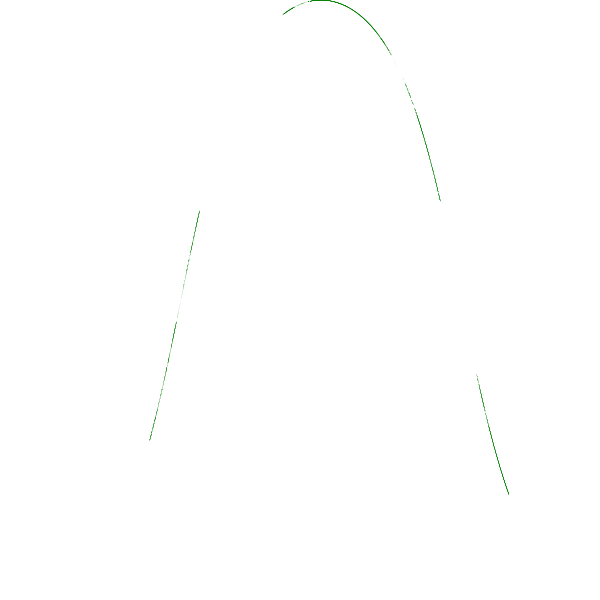

In [15]:
%%time
cvs = ds.Canvas()#plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(hdf, 'geolocation/lon_lowestmode', 'geolocation/lat_lowestmode',  ds.count('cover'))
img = tf.shade(agg, cmap=["white", 'green'], how='eq_hist')
img

In [11]:
y_range=(0.859601e+01, 2.229628e+01)
x_range=(-6.516158e+01, -5.089620e+00)
plot_width=int(750)
plot_height = int(plot_width//1.2)

CPU times: user 502 ms, sys: 17.9 ms, total: 520 ms
Wall time: 541 ms


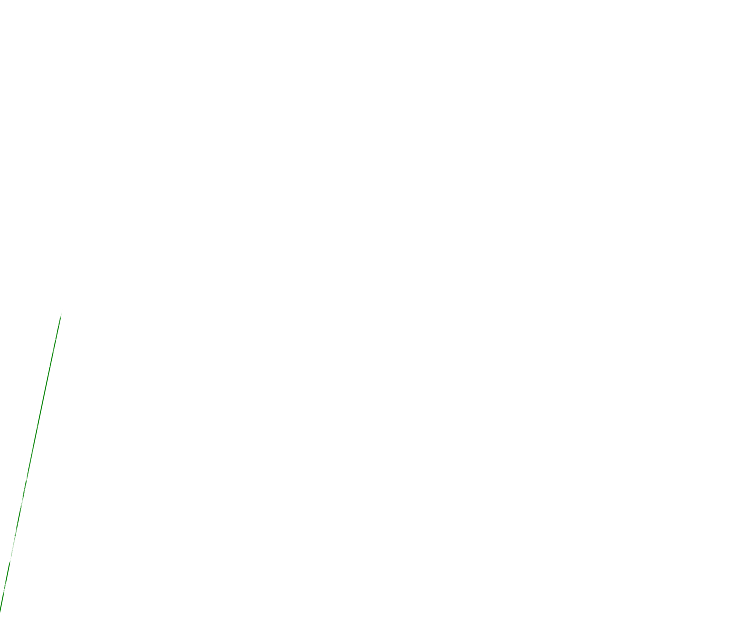

In [19]:
%%time
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(hdf, 'geolocation/lon_lowestmode', 'geolocation/lat_lowestmode',  ds.count('pai'))
img = tf.shade(agg, cmap=["white", 'green'], how='linear')
img